# **Mileage Prediction**

-------------

## **Objective**

The objective of the **Mileage Prediction** project is to develop a machine learning model that can predict the mileage or fuel efficiency of vehicles based on various features or factors. By achieving this objective, we aim to provide valuable insights to users, such as car manufacturers or consumers, to make informed decisions about fuel-efficient vehicles. This project will involve data collection, data preprocessing, model development, and evaluation to create a reliable mileage prediction tool.

## **Data Source**

I got the data set from the **github page of YBI Foundation**. Here is the link of the data set: https://github.com/YBI-Foundation/Dataset/blob/main/MPG.csv

## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
print(print("The dependencies are imported"))

The dependencies are imported
None


## **Import Data**

In [2]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## **Describe Data**

In [3]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [4]:
data.shape

(398, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [10]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## **Data Visualization**

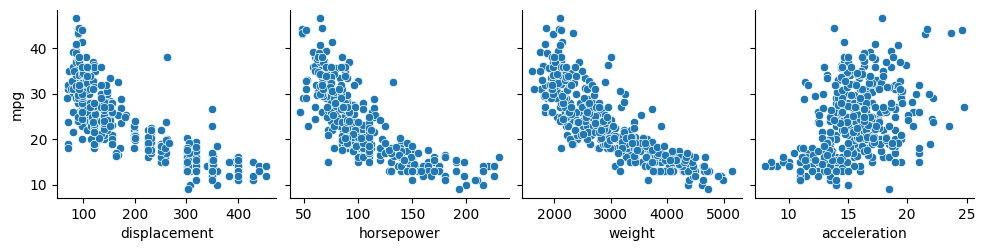

In [13]:
sns.pairplot(data, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration'], y_vars=['mpg'])

<AxesSubplot: xlabel='displacement', ylabel='mpg'>

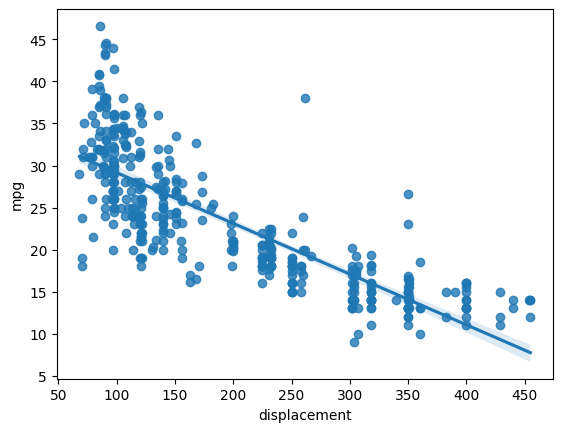

In [14]:
sns.regplot(x = 'displacement', y='mpg', data = data)

## **Data Preprocessing**

In [8]:
data.corr()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8248\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Removing missing values

In [28]:
data = data.dropna()

## **Define Target Variable (y) and Feature Variables (X)**

In [29]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [30]:
y = data['mpg']
x = data[['displacement', 'horsepower', 'weight', 'acceleration']]

In [31]:
print(y.shape)
print(x.shape)

(392,)
(392, 4)


In [32]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [33]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


## **Scaling Data**

In [34]:
ss = StandardScaler()

In [35]:
x = ss.fit_transform(x)
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [36]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


## **Train Test Split**

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 49)

In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((294, 4), (294,), (98, 4), (98,))

## **Modeling**

In [39]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [41]:
print("Intercept = ", linear_model.intercept_)
print("coefficients = ", linear_model.coef_)

Intercept =  23.392166822244764
coefficients =  [-1.99696613 -1.09412911 -3.65092771 -0.24283731]


## **Prediction**

In [42]:
y_pred = linear_model.predict(x_test)
y_pred

array([14.61921671, 29.90989682, 17.01827011, 30.31309961, 25.59592601,
       18.76831554, 27.89788852, 25.1824726 , 13.38252492, 21.19479572,
       26.24113771, 30.93197937, 25.48006761, 25.52192132, 21.29655328,
        9.24148065, 30.83071082, 30.6375111 , 30.03473139, 16.50979204,
       14.13578488, 25.05583699, 32.39681629, 28.56434469, 29.45928424,
       17.36989855, 19.9130075 , 15.45395283, 26.20298028, 26.58391726,
       29.97209506, 16.88262304, 12.55119812, 26.70939845, 24.23344299,
       21.07561102, 30.74112189, 16.96604599, 26.58612933, 30.56411372,
       26.37153319, 30.85898771, 30.60448872, 12.60027347, 20.92326377,
       13.80520096, 31.28505358, 21.93932921, 27.92266976, 29.69830778,
       31.81713783, 11.37216917, 17.36989855, 27.94884496, 31.02483123,
       13.13806442, 14.94085548, 26.2623862 , 30.02519991, 26.14013484,
       30.09958268, 30.11301699, 25.99455156, 30.58092756, 22.4420413 ,
       26.02163585, 30.77848733, 29.28794029, 25.46082403, 29.46

## **Model Evaluation**

In [43]:
print("mean absolute error = ", mean_absolute_error(y_test, y_pred))
print("r2 score = ", r2_score(y_test, y_pred))

mean absolute error =  3.3563730533659495
r2 score =  0.68110718780989


## **Explaination**

**Import Library**: The project began by importing essential Python libraries such as NumPy, Pandas, Matplotlib, Seaborn, and scikit-learn. These libraries facilitated data manipulation, visualization, and model development.

**Import Data**: The dataset was loaded into a Pandas DataFrame directly from its GitHub repository. This step ensured that the project always used the latest available data for analysis and model training.

**Describe Data**: To gain a better understanding of the dataset, we performed various exploratory data analysis (EDA) tasks, including examining the number of unique values, the dataset's shape, information about data types, and summary statistics. Additionally, we checked for missing values to ensure data completeness.

**Data Visualization**: Data visualization played a crucial role in understanding the relationships between features and the target variable (mileage). We used Seaborn to create pair plots and regression plots, providing insights into how certain features, such as displacement and horsepower, correlate with mileage.

**Data Preprocessing**: Data preprocessing involved addressing missing values by removing rows with missing data. This step ensured that our model was trained on clean and complete data.

**Define Target Variable (y) and Feature Variables (X)**: The target variable (y) for our model was defined as 'mpg' (miles per gallon), while the feature variables (X) included 'displacement,' 'horsepower,' 'weight,' and 'acceleration.' These features were selected based on their potential impact on mileage.

**Scaling Data**: To standardize the feature variables and bring them to a common scale, we employed StandardScaler from scikit-learn. Scaling helps in improving the convergence speed of machine learning algorithms.

**Train Test Split**: The dataset was divided into training and testing sets, with 75% of the data used for training and 25% for testing. Random_state was set for reproducibility.

**Modeling**: We chose a Linear Regression model for this project, considering its simplicity and interpretability. The model was trained on the training data to learn the relationships between the selected features and mileage.

**Prediction**: After training, the model was used to make predictions on the test data. The predicted mileage values (y_pred) were generated.

**Model Evaluation**: Model performance was assessed using two key metrics: Mean Absolute Error (MAE) and R-squared (R2) score. MAE measures the average prediction error, while R2 score indicates the proportion of variance in the target variable explained by the model.

